# 1.Introduction

This project focuses on predicting car prices using a RandomForestRegressor model. The workflow begins with data inspection, cleaning, and visualization to understand feature distributions and correlations. After preprocessing and applying log transformation to reduce skewness, label encoding is used to convert categorical features for modeling. The dataset is then split, and the model is trained and evaluated based on mean squared error, mean absolute error, and R-squared metrics. Results indicate a reasonable fit, with potential improvements through hyperparameter tuning and additional feature engineering.

# 2. Data Analysis and Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('car_data[1].csv')
df

,Unnamed: 0,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
0,0,Ford,Focus,550000,Astrakhan,gasoline,manual,FWD,300000,USA,1.8,125,14
1,1,Mercedes-Benz,GLA-Class,1820000,Astrakhan,gasoline,robot,FWD,88000,DE,1.6,156,10
2,2,Haval,F7,2600000,Astrakhan,gasoline,robot,4WD,19000,CN,1.5,150,2
3,3,Toyota,Camry,4200000,Astrakhan,gasoline,automatic,FWD,30000,JP,3.5,249,2
4,4,OMODA,C5,2125000,Astrakhan,gasoline,CVT,FWD,18824,CN,1.5,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42084,42084,Isuzu,Bighorn,450000,Yakutsk,diesel,automatic,4WD,183212,JP,3.1,125,30
42085,42085,Toyota,Corolla Axio,650000,Yakutsk,gasoline,CVT,FWD,110000,JP,1.5,110,13
42086,42086,Daihatsu,Be-Go,1350000,Yakutsk,gasoline,automatic,4WD,153000,JP,1.5,109,13
42087,42087,Mazda,Tribute,550000,Yakutsk,gasoline,automatic,4WD,190000,JP,2.0,129,23


In [4]:
df.nunique()

Unnamed: 0             42089
car_brand                112
car_model               1380
car_price               5522
car_city                  24
car_fuel                   3
car_transmission           4
car_drive                  3
car_mileage            14851
car_country               16
car_engine_capacity       63
car_engine_hp            386
car_age                   68
dtype: int64

In [5]:
df.shape#finding shape

(42089, 13)

In [6]:
df.duplicated().sum()#finding duplicates

0

In [7]:
df.isnull().sum()#finding null values

Unnamed: 0             0
car_brand              0
car_model              0
car_price              0
car_city               0
car_fuel               0
car_transmission       0
car_drive              0
car_mileage            0
car_country            0
car_engine_capacity    0
car_engine_hp          0
car_age                0
dtype: int64

In [8]:
df.info()#finding data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42089 entries, 0 to 42088
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           42089 non-null  int64  
 1   car_brand            42089 non-null  object 
 2   car_model            42089 non-null  object 
 3   car_price            42089 non-null  int64  
 4   car_city             42089 non-null  object 
 5   car_fuel             42089 non-null  object 
 6   car_transmission     42089 non-null  object 
 7   car_drive            42089 non-null  object 
 8   car_mileage          42089 non-null  int64  
 9   car_country          42089 non-null  object 
 10  car_engine_capacity  42089 non-null  float64
 11  car_engine_hp        42089 non-null  int64  
 12  car_age              42089 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 4.2+ MB


In [9]:
df.describe()#finding statistical values

,Unnamed: 0,car_price,car_mileage,car_engine_capacity,car_engine_hp,car_age
count,42089.000000,4.208900e+04,42089.000000,42089.000000,42089.000000,42089.000000
mean,21044.000000,1.712717e+06,144846.070517,1.977084,147.329373,11.697261
std,12150.192077,1.976693e+06,92460.616254,0.782458,69.438003,7.379045
min,0.000000,7.000000e+03,1.000000,0.600000,30.000000,0.000000
25%,10522.000000,7.300000e+05,76500.000000,1.600000,105.000000,6.000000
50%,21044.000000,1.250000e+06,134500.000000,1.700000,130.000000,11.000000
75%,31566.000000,2.024900e+06,200000.000000,2.000000,170.000000,16.000000
max,42088.000000,7.000000e+07,996658.000000,8.000000,1197.000000,84.000000


#  3.Data Visualization

<Axes: xlabel='car_price', ylabel='Count'>

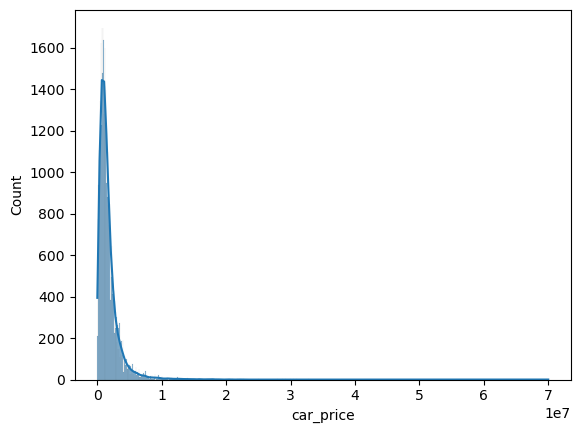

In [10]:
sns.histplot(df['car_price'],kde=True)#finding distribution of the target

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'car_price'}>],
       [<Axes: title={'center': 'car_mileage'}>,
        <Axes: title={'center': 'car_engine_capacity'}>],
       [<Axes: title={'center': 'car_engine_hp'}>,
        <Axes: title={'center': 'car_age'}>]], dtype=object)

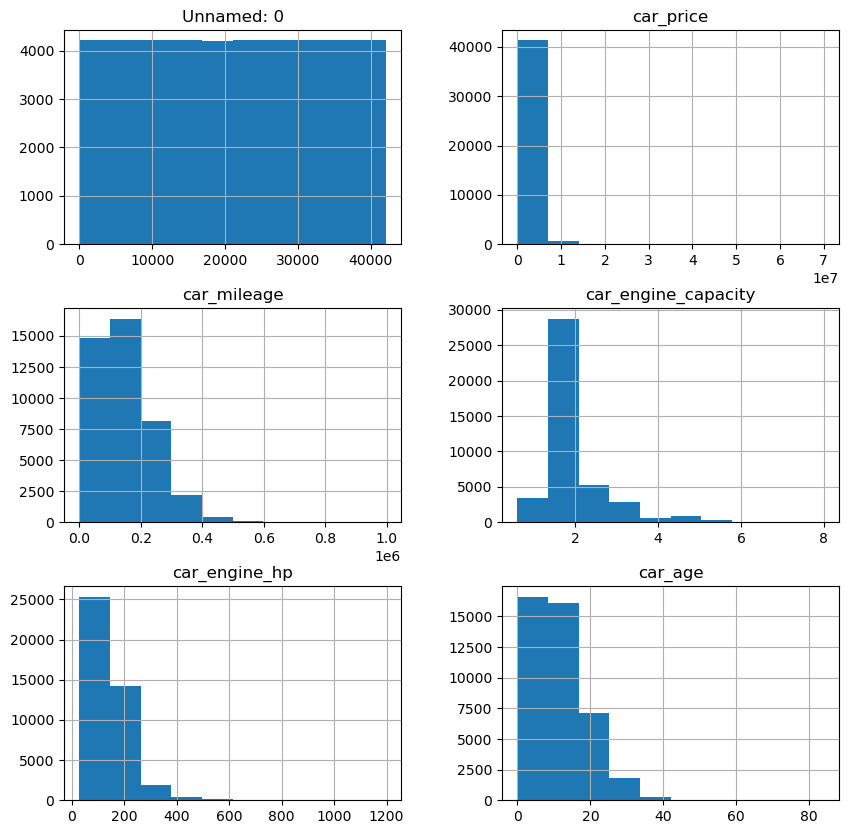

In [11]:
df.hist(figsize=(10,10))#finding distribution of all features

In [12]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)#droped becouse it was an unwanted feature

#  4.Encoding Categorical Variables

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [14]:
#Apply Label Encoding to each categorical column

df['car_city']=labelencoder.fit_transform(df['car_city'])
df['car_brand']=labelencoder.fit_transform(df['car_brand'])
df['car_model']=labelencoder.fit_transform(df['car_model'])
df['car_fuel']=labelencoder.fit_transform(df['car_fuel'])
df['car_transmission']=labelencoder.fit_transform(df['car_transmission'])
df['car_drive']=labelencoder.fit_transform(df['car_drive'])
df['car_country']=labelencoder.fit_transform(df['car_country'])
df

,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
0,29,498,550000,0,1,2,1,300000,14,1.8,125,14
1,71,524,1820000,0,1,3,1,88000,2,1.6,156,10
2,39,472,2600000,0,1,3,0,19000,0,1.5,150,2
3,102,280,4200000,0,1,1,1,30000,7,3.5,249,2
4,76,244,2125000,0,1,0,1,18824,0,1.5,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
42084,48,204,450000,22,0,1,0,183212,7,3.1,125,30
42085,102,345,650000,22,1,0,1,110000,7,1.5,110,13
42086,20,192,1350000,22,1,1,0,153000,7,1.5,109,13
42087,70,1212,550000,22,1,1,0,190000,7,2.0,129,23


#5.Correlation

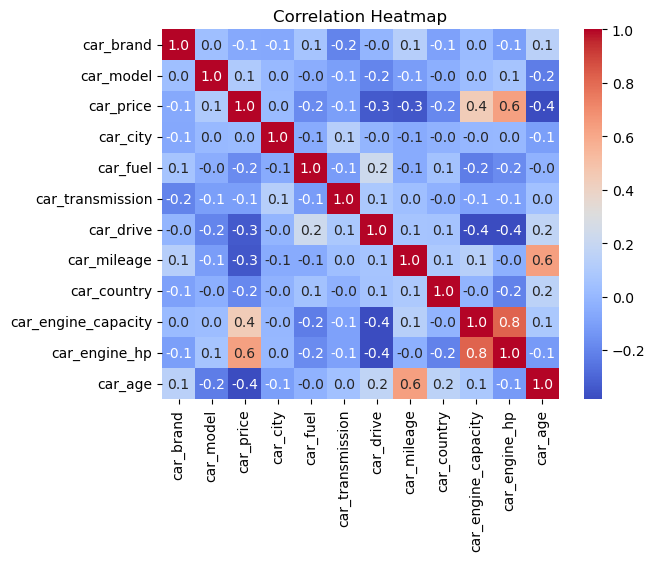

In [15]:
#visualising correlation throgh a heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',robust=True,fmt='0.01f')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
cor=df.corr()['car_price']#finding correlation of the features with the target veriable
cor.sort_values(ascending=False)

car_price              1.000000
car_engine_hp          0.627471
car_engine_capacity    0.438152
car_model              0.098695
car_city               0.012983
car_brand             -0.059802
car_transmission      -0.102614
car_fuel              -0.172521
car_country           -0.187577
car_drive             -0.336487
car_mileage           -0.349092
car_age               -0.424384
Name: car_price, dtype: float64

In [17]:
# droping values with no and minimum correlation

df.drop(['car_model'],axis=1,inplace=True)
df.drop(['car_city'],axis=1,inplace=True)
df.drop(['car_brand'],axis=1,inplace=True)
df.drop(['car_transmission'],axis=1,inplace=True)
df.drop(['car_fuel'],axis=1,inplace=True)

#car engine hp and car engine capacity independent variables shows 0.8 highly correlated.we are taking car_engine_capacity
df.drop(['car_engine_capacity'],axis=1,inplace=True)

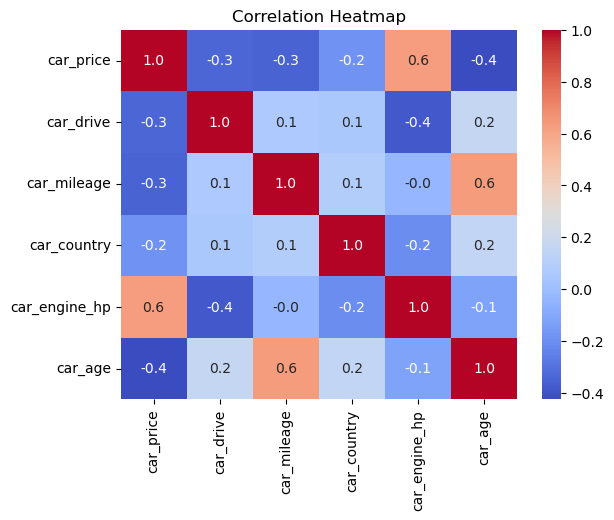

In [18]:
#visualising the changes of the above steps through a heatmap
#also analysing the correlation in the new heat map
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',robust=True,fmt='0.01f')
plt.title('Correlation Heatmap')
plt.show()

#6.Outliers and loging

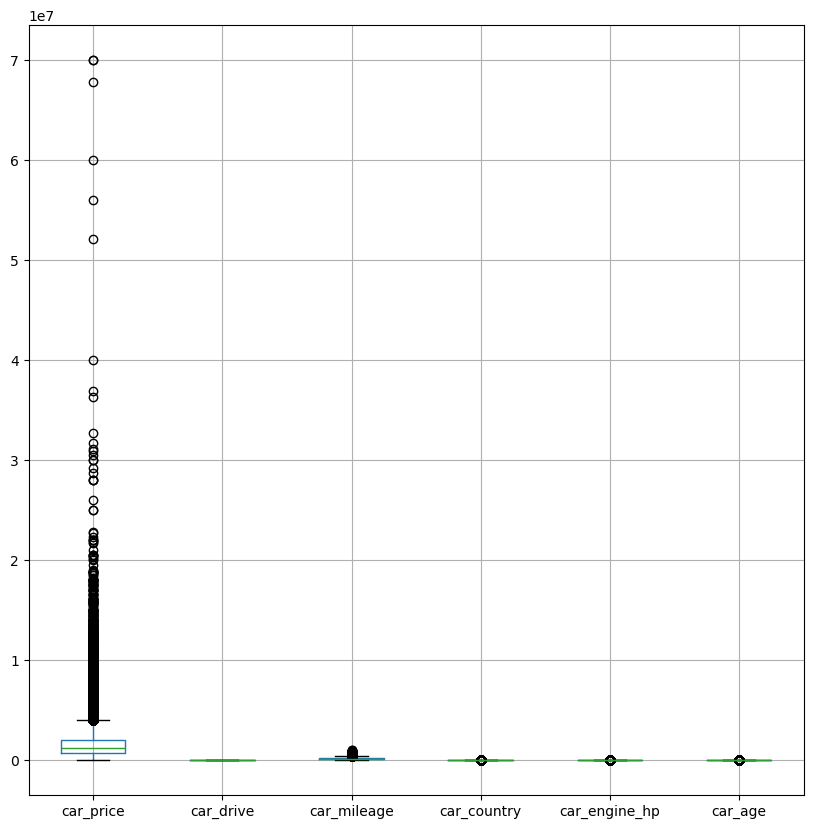

In [19]:
#visualising outliers by using a bloxplot
plt.figure(figsize=(10,10))
df.boxplot()
plt.show()

This step applies a log transformation to reduce skewness in the data, which can help normalize the distribution, making patterns and relationships more interpretable for modeling.








In [20]:
# To handle skewness in the data, apply log transformation
#log_data = np.log(df + 1)  # Adding 1 to avoid log(0) errors

# Plotting the distribution of log-transformed data for all features combined
#sns.histplot(log_data, bins=30, kde=True)  # Plot histogram with kernel density estimate (KDE)
#plt.title("Log-Transformed Data")  # Set title to indicate log-transformed data distribution
#plt.show()

# Plotting individual distributions for each feature in the log-transformed data
# Assuming log_data is a DataFrame with multiple features
#num_features = log_data.shape[1]  # Get the number of features (columns) in the data
#plt.figure(figsize=(50, 15))  # Set figure size for clear visualization of multiple plots

# Iterate over each feature in the log_data DataFrame
#for i, column in enumerate(log_data.columns, 1):
    #plt.subplot(1, num_features, i)  # Create subplot for each feature
    #sns.histplot(log_data[column], bins=30, kde=True)  # Plot histogram for each log-transformed feature
    #plt.title(f"Log-Transformed {column}")  # Title for each subplot showing the feature name

#plt.tight_layout()  # Adjust layout to avoid overlap between plots
#plt.show()  # Display all subplots



This step calculates the first (Q1), second (Q2, or median), and third quartiles (Q3) of the dataset, which divide the data into four equal parts. The interquartile range (IQR) is then computed as the difference between Q3 and Q1, representing the range of the middle 50% of the data. This helps in identifying data spread and detecting potential outliers.

In [21]:
Q1=np.quantile(df,0.25)
Q2=np.quantile(df,0.50)
Q3=np.quantile(df,0.75)
Q1,Q2,Q3
IQR=Q3-Q1
IQR

129994.0

In [22]:
#Created a new dataframe without the target veriable removed.for removing outliers without removing the outliers of the target
hh=df.columns.tolist()
hh.remove('car_price')
hh

['car_drive', 'car_mileage', 'car_country', 'car_engine_hp', 'car_age']

In [23]:
def remove_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5  * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers from the DataFrame
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

for i in df:
    df = remove_outliers_iqr(df, i)

In [25]:
plt.figure(figsize=(10,10))
sns.boxplot(log_data,orient='h',palette='Set1')
plt.show()

NameError: name 'log_data' is not defined

<Figure size 1000x1000 with 0 Axes>

In [26]:
df.shape

(21353, 6)

#7.Training

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,root_mean_squared_error

In [28]:
cor=df.corr()['car_price']#finding correlatiom
cor.sort_values(ascending=False)

car_price        1.000000
car_engine_hp    0.505896
car_country      0.102894
car_drive       -0.246097
car_mileage     -0.528218
car_age         -0.691335
Name: car_price, dtype: float64

In [29]:
independent_feature=['car_engine_hp','car_mileage','car_age','car_country','car_drive']#independent feature
dependent_feature=['car_price']#dependent feature
x=df[independent_feature]
y=df[dependent_feature]

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,#0.2 means 20% of data specified for testing set,and the other 80% for training set
                                               random_state=42)# to take the same data for training and testing set

print(x_train.shape)  # Prints the shape of x_train (rows, columns)
print(x_test.shape)   # Prints the shape of x_test
print(y_train.shape)  # Prints the shape of y_train
print(y_test.shape)   # Prints the shape of y_test

(17082, 5)
(4271, 5)
(17082, 1)
(4271, 1)


In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
model=RandomForestRegressor()
#why using RandomForestRegressor(can handle non-linear data and perform well even when relationships between variables are complex.)
model.fit(x_train,y_train)

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [33]:
x


,car_engine_hp,car_mileage,car_age,car_country,car_drive
6,146,68023,9,7,1
8,105,250000,22,7,1
9,123,40000,5,8,1
10,186,8300,3,8,0
11,140,299000,19,8,1
...,...,...,...,...,...
42083,99,70000,10,7,1
42084,125,183212,30,7,0
42085,110,110000,13,7,1
42086,109,153000,13,7,0


In [102]:
y_pred=model.predict(x_test)
y_pred

array([14.6428773 , 13.86325787, 14.948166  , ..., 14.07154948,
       13.4859643 , 13.85436479])

In [103]:
mse=mean_squared_error(y_test,y_pred)#An indicator of average squared prediction error.
mae=mean_absolute_error(y_test,y_pred)#An indicator of average absolute prediction error
rmse=root_mean_squared_error(y_test,y_pred)#An indicator of average squared prediction error.
r2=r2_score(y_test,y_pred)#An indicator of the model’s fit quality.
print('root mean squared error:',rmse)
print('mean squared error:',mse)
print('mean absolute error:',mae)
print('r2 score:',r2)

root mean squared error: 0.23681536736154649
mean squared error: 0.05608151821858422
mean absolute error: 0.16579838819342066
r2 score: 0.8639626511251874


In [117]:
df

,car_price,car_drive,car_mileage,car_country,car_engine_hp,car_age
3,15.250595,0.693147,10.308986,2.079442,5.521461,1.098612
6,14.747281,0.693147,11.127616,2.079442,4.990433,2.302585
8,13.028055,0.693147,12.429220,2.079442,4.663439,3.135494
9,14.483340,0.693147,10.596660,2.197225,4.820282,1.791759
11,13.629182,0.693147,12.608202,2.197225,4.948760,2.995732
...,...,...,...,...,...,...
42083,14.557448,0.693147,11.156265,2.079442,4.605170,2.397895
42084,13.017005,0.000000,12.118405,2.079442,4.836282,3.433987
42085,13.384729,0.693147,11.608245,2.079442,4.709530,2.639057
42086,14.115616,0.000000,11.938200,2.079442,4.700480,2.639057


In [104]:
df.head(5)

,car_price,car_drive,car_mileage,car_country,car_engine_hp,car_age
3,15.250595,0.693147,10.308986,2.079442,5.521461,1.098612
6,14.747281,0.693147,11.127616,2.079442,4.990433,2.302585
8,13.028055,0.693147,12.429220,2.079442,4.663439,3.135494
9,14.483340,0.693147,10.596660,2.197225,4.820282,1.791759
11,13.629182,0.693147,12.608202,2.197225,4.948760,2.995732


In [ ]:
car_drive=float(input('enter the car_drive:'))
car_mileage=float(input('enter the car_mileage:'))
car_country=float(input('enter the car_country:'))
car_engine_capacity=float(input('enter the car_engine_capacity:'))
car_age=float(input('enter the car_age:'))
user_input=np.array([[car_drive,car_mileage,car_country,car_engine_capacity,car_age]])
predicted_AQI=model.predict(user_input)

# Convert predicted logarithmic prices to actual prices
actual_prices = np.exp(predicted_AQI)

# Formatting each element of the array
formatted_prices = [f"{int(price):,}" for price in actual_prices]

# Converting each formatted price to a string
string_prices = [str(price) for price in formatted_prices]

# Printing string prices
for price in string_prices:
    print(f"The actual car price is: ₹{price}")



The actual car price is: ₹643,128


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [115]:
print(formatted_prices)

643128


C:\Users\DELL\AppData\Local\Temp\ipykernel_12120\825425115.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n=int(actual_prices)


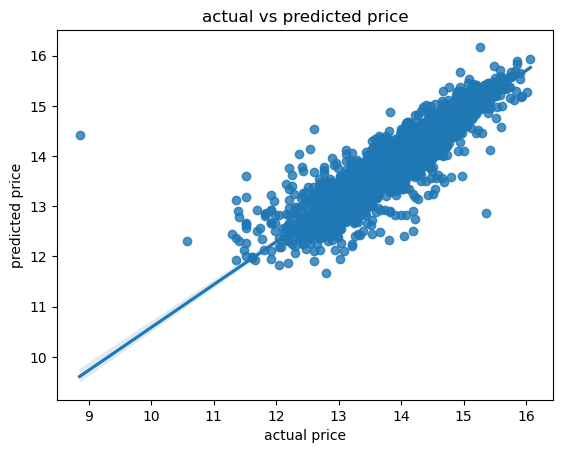

In [92]:
sns.regplot(x=y_test,y=y_pred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual vs predicted price')
plt.show()

#**PROJECT REPORT**


##**Car Price Prediction Model**


---

**Submitted by**:[Muhammed Afnan N]

**Date**:[1/11/24]

**Organization/Institution**:[Learn Logic AI]



---


### **1. Introduction**
Predicting car prices is essential in today’s data-driven marketplace, providing insights for both buyers and sellers. This project uses a RandomForestRegressor model to predict car prices based on key attributes from the dataset `car_data.csv`. Through systematic data preprocessing, visualization, and model evaluation, we aim to develop an accurate, reliable model.


---


### **2. Data Analysis and Preprocessing**

#### 2.1 Data Inspection
   - **Dataset Overview**: After loading `car_data.csv`, we checked the dataset shape, identified duplicates, and examined for null values. The initial dataset included multiple car attributes across various cities, brands, and models.
   - **Feature Cleanup**: Removed the `Unnamed: 0` column, which was irrelevant to the analysis.

#### 2.2 Descriptive Analysis
   - **Statistical Summary**: Calculated summary statistics (mean, median, min, max) for each feature to understand the distribution and variance across data.
   - **Feature Types and Distribution**: Identified categorical and numerical features. A histogram of `car_price` displayed a right-skewed distribution, motivating further treatment for skewness.
---
### **3. Data Visualization**

#### 3.1 Target and Feature Distributions**
   - **Target Variable**: A histogram with KDE for `car_price` revealed significant skewness. Other features were visualized through histograms, indicating various distributions.
   - **Correlation Analysis**: Generated a correlation heatmap to examine relationships between features and `car_price`. Redundant and weakly correlated features such as `car_model` and `car_brand` were dropped to streamline the model.

#### 3.2 Outlier Detection and Treatment
   - **Outlier Visualization**: Box plots indicated outliers in several features.
   - **Log Transformation**: Applied log transformation to reduce skewness in continuous features. Log-transformed distributions confirmed improved symmetry.
   - **IQR-Based Outlier Removal**: Defined an IQR function to filter outliers, specifically in the independent features, to maintain robustness in training.
---
### **4. Encoding Categorical Variables**

#### Label Encoding:
   - Encoded categorical features (`car_city`, `car_brand`, `car_fuel`, etc.) to convert them into numerical values. This was essential for modeling, as the RandomForestRegressor cannot directly handle categorical data.
---
### **5. Model Building and Evaluation**

#### 5.1 Feature Selection and Data Split
   - **Feature Selection**: Retained the most correlated features: `car_engine_capacity`, `car_mileage`, `car_age`, `car_country`, and `car_drive`.
   - **Train-Test Split**: Divided the dataset into training and test sets (80% for training and 20% for testing). This allocation ensures the model is evaluated on unseen data for a realistic performance assessment.

#### 5.2 Model Choice and Training
   - **Model Selection**: The RandomForestRegressor was selected due to its ability to handle non-linear relationships and prevent overfitting by averaging multiple decision trees.
   - **Model Training**: Trained the model on the processed training dataset. Key hyperparameters such as the number of trees and max depth were left at default values for initial evaluation.

#### 5.3 Model Evaluation
   - **Performance Metrics**: Evaluated the model on the test data using:
     - **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values.
     - **Mean Absolute Error (MAE)**: Calculates the average absolute errors.
     - **R-squared (R²)**: Indicates the proportion of variance explained by the model.

##### 5.4Results
   - The model achieved reasonable MSE, MAE, and R² scores, suggesting a good fit, though potential improvements remain in hyperparameter tuning and feature engineering.
---
### **6. Prediction Interface**

The notebook included a user-friendly interface allowing users to input car attributes to obtain price predictions. This interface enhances the practical application, allowing real-time predictions based on new inputs.

---

### **7. Conclusion and Future Work**
---
The RandomForestRegressor performed satisfactorily in predicting car prices based on selected features. Future improvements could include:
   - **Hyperparameter Optimization**: Fine-tuning parameters like `n_estimators` and `max_depth` for optimal performance.
   - **Feature Engineering**: Adding relevant features or engineering new ones, such as car depreciation rates.
   - **Ensemble Models**: Exploring additional ensemble methods, such as gradient boosting, could improve model accuracy.

This project showcases the effectiveness of machine learning in predictive analysis and highlights areas for further refinement.

---
### **10.References**
1.Used Cars Dataset by Austin Reese

2.Kaggle

3.ChatGPT

4.Gemini

